In [44]:
from collections import defaultdict
import pandas as pd
#from bs4 import BeautifulSoup
import glob, os
import pickle
import matplotlib.pyplot as plt

import re

In [45]:
!ls 



I-existing_data_to_df.ipynb
II-EDA_cleaning.ipynb
II-Transcript_to_df_TED.ipynb
III-Topic_Modeling .ipynb
III-Transcripts_Topic_Modeling2.ipynb
Notes
blogger_com_data_19320_6.pkl
blogger_com_data_19320_6_v2.pkl
blogger_com_data_330677_7.pkl
blogs
feature_preprocessing_EDA_8162_0416.ipynb
schler_springsymp06.pdf
test.csv
yoga_scrape_helpers.ipynb


In [46]:
with open('blogger_com_data_19320_6_v2.pkl', 'rb') as pf:
    data = pickle.load(pf)

In [47]:
with open('blogger_com_data_330677_7.pkl', 'rb') as picklefile:
    data_full = pickle.load(picklefile)

In [48]:
#!pwd

In [49]:
data.shape

(19320, 6)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19320 entries, 0 to 19319
Data columns (total 6 columns):
blogger_id    19320 non-null object
gender        19320 non-null object
age           19320 non-null object
occupation    19320 non-null object
name          19320 non-null object
post          19320 non-null object
dtypes: object(6)
memory usage: 905.8+ KB


In [51]:
data.head()

,blogger_id,gender,age,occupation,name,post
0,1000331,female,37,indUnk,Leo,My four-year old never stops talking. ...
1,1000866,female,17,Student,Libra,"Yes, I did say goodbye to my friends an..."
2,1004904,male,23,Arts,Capricorn,if she wants me too then I will go to h...
3,1005076,female,25,Arts,Cancer,"The following things about last night ""..."
4,1005545,male,25,Engineering,Sagittarius,Blogdex Blogdex is a research pro...


In [52]:
data.groupby(['gender']).gender.agg('count')#plt.bar(data['gender'],)

gender
female    9660
male      9660
Name: gender, dtype: int64

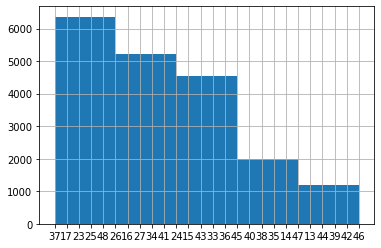

In [53]:
data['age'].hist(bins=5);

Text(0, 0.5, 'Frequency')

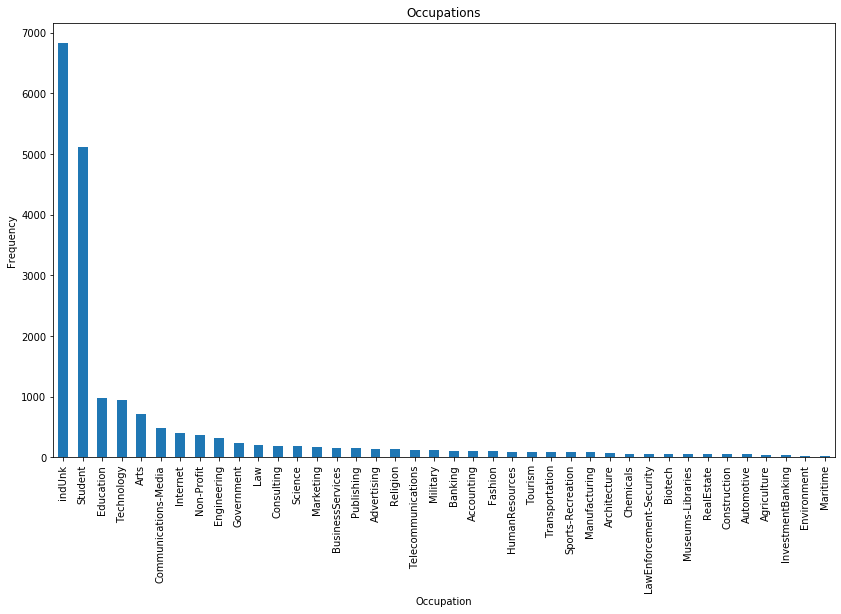

In [54]:
ax = data['occupation'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Occupations")
ax.set_xlabel("Occupation")
ax.set_ylabel("Frequency")

In [55]:
data['len_post'] = data['post'].apply(len)

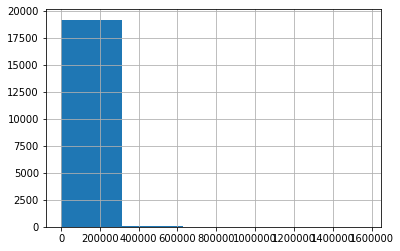

In [56]:
data['len_post'].hist(bins=5);

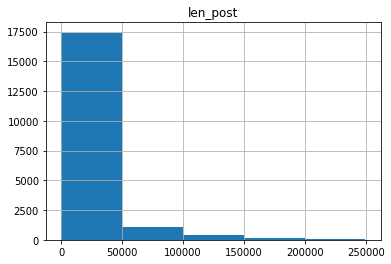

In [58]:
data[data['len_post']<250000].hist(bins=5);

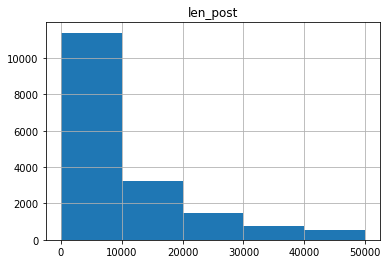

In [59]:
data[data['len_post']<50000].hist(bins=5);

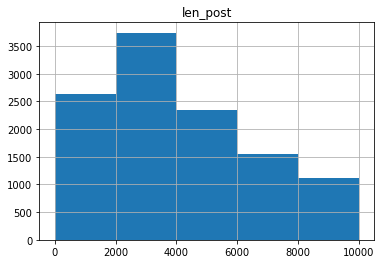

In [60]:
data[data['len_post']<10000].hist(bins=5);

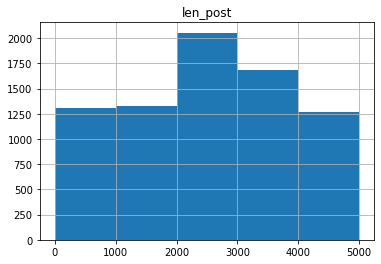

In [61]:
data[data['len_post']<5000].hist(bins=5);

In [63]:
data

,blogger_id,gender,age,occupation,name,post,len_post
0,1000331,female,37,indUnk,Leo,My four-year old never stops talking. ...,4583
1,1000866,female,17,Student,Libra,"Yes, I did say goodbye to my friends an...",335483
2,1004904,male,23,Arts,Capricorn,if she wants me too then I will go to h...,677
3,1005076,female,25,Arts,Cancer,"The following things about last night ""...",15222
4,1005545,male,25,Engineering,Sagittarius,Blogdex Blogdex is a research pro...,52454
...,...,...,...,...,...,...,...
19315,996147,female,36,Telecommunications,Leo,Ho hum.... Vacationed in Haw...,57177
19316,997488,male,25,indUnk,Cancer,i've come back to blogs fire truck...,863
19317,998237,female,16,indUnk,Virgo,well hey look who it is... im actually...,155485
19318,998966,male,27,indUnk,Taurus,"Finally, a green pepper is g...",1736


In [88]:
with open('blogger_com_data_19320_&_clean.pkl', 'wb') as pf:
    pickle.dump(data, pf)

# with time component

In [62]:
data_full

,date,blogger_id,gender,age,occupation,name,post
0,"19,August,2004",4162441,male,16,Student,Sagittarius,DESTINY... you might not say a...
13,"19,August,2004",4157968,male,16,Student,Pisces,"As I strolled into the mall yesterday,..."
17,"19,August,2004",4278694,female,24,Technology,Virgo,I've never really had a blog bef...
69,"19,August,2004",4261114,female,40,indUnk,Gemini,I love to read novels. I l...
79,"19,August,2004",4215047,male,17,Student,Aquarius,today.. really a very sad day...
...,...,...,...,...,...,...,...
50463676,"12,February,1999",2999514,male,27,Engineering,Pisces,[detail] Propog...
50482996,"01,April,1999",2999514,male,27,Engineering,Pisces,[detail] I actually...
50502316,"05,June,1999",2999514,male,27,Engineering,Pisces,[detail] A tria...
50521636,"16,December,1999",2999514,male,27,Engineering,Pisces,[detail] Points...


In [25]:
data_full = data_full[data_full['blogger_id'] != '113390']

In [26]:
temp = data_full['date'].str.replace('mai', 
                                                  'May').str.replace('agosto',
                                                'August').str.replace('Junho',
                                                'June').str.replace('Juli',
                                                'July').str.replace('juin',
                                                'June').str.replace('juillet',
                                                'July').str.replace('Agosto',
                                                'August').str.replace('Julho',
                                                'July').str.replace('Setembro',
                                                'September').str.replace('Outubro',
                                                'October').str.replace('Novembro',
                                                'November').str.replace('Dezembro',
                                                'December').str.replace('Janeiro',
                                                'January').str.replace('Fevereiro',
                                                'February').str.replace('Abril',
                                                'April').str.replace('Maio',
                                                'May').str.replace('mayo', 
                                                'May').str.replace('mei', 
                                                'May').str.replace('juli', 
                                                'July').str.replace('juni', 
                                                'July').str.replace('mars', 
                                                'March').str.replace('septembre', 
                                                'September').str.replace('octobre', 
                                                'October').str.replace('novembre', 
                                                'November').str.replace('Decembre', 
                                                'December').str.replace('janvier', 
                                                'January').str.replace('avril', 
                                                'April').str.replace('febrero', 
                                                'February').str.replace('marzo', 
                                                'March').str.replace('abril',
                                                'April').str.replace('Julyo',
                                                'July')
data_full['date'] = temp

/Users/elena/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [27]:
temp = data_full['date'].str.replace('septiembre', 
                                                  'September').str.replace('June1June9June,JuneAJuneuJunegJuneuJunesJunetJune,June2June0June0June4June',
                                                'June').str.replace('AugustJAugustuAugustnAugusteAugust',
                                                'August').str.replace('JulyAJulyuJulygJulyuJulysJulytJuly',
                                                'July').str.replace('NovemberJNovemberuNovemberlNovemberyNovember',
                                                'November').str.replace('octubre',
                                                'October').str.replace('noviembre',
                                                'November').str.replace('diciembre',
                                                'December').str.replace('enero',
                                                'January').str.replace('Juni',
                                                'June').str.replace('augustus',
                                                'August').str.replace('desember',
                                                'December').str.replace('augusti',
                                                'August').str.replace('toukokuu',
                                                'May').str.replace('maj',
                                                'May').str.replace('Avgust',
                                                'August').str.replace('Mai', 
                                                'May').str.replace('mei', 
                                                'May').str.replace('', 
                                                '').str.replace('Januaryyy', 
                                                'January').str.replace('maart', 
                                                'March').str.replace('septembrie', 
                                                'September').str.replace('noiembrie', 
                                                'November').str.replace('ianuarie', 
                                                'January').str.replace('februarie', 
                                                'February').str.replace('iulie', 
                                                'July').str.replace('Juuni', 
                                                'June').str.replace('Jaanuar', 
                                                'January').str.replace('Juuli', 
                                                'July').str.replace('ottobre',
                                                'October').str.replace('luglio',
                                                'July').str.replace('Aprill',
                                                'April').str.replace('giugno',
                                                'June').str.replace('lipanj',
                                                'June').str.replace('kolovoz',
                                                'August').str.replace('elokuu',
                                                'August').str.replace('Dezember',
                                                'December').str.replace('lipiec',
                                                'July').str.replace('czerwiec',
                                                'June')
data_full['date'] = temp

/Users/elena/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [28]:
def exact_correction_Januar(string):
    return re.sub(r'\bJanuar\b', 'January', string)
def exact_correction_Februar(string):
    return re.sub(r'\bFebruar\b', 'February', string)

temp1 = data_full['date'].apply(exact_correction_Januar)
data_full['date'] = temp1
temp2 = data_full['date'].apply(exact_correction_Februar)
data_full['date'] = temp2

/Users/elena/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/elena/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [78]:
temp = pd.to_datetime(data_full['date'],  errors='coerce')
data_full.loc[:,'date'] = temp

In [79]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330677 entries, 0 to 50541018
Data columns (total 7 columns):
date          328924 non-null datetime64[ns]
blogger_id    330677 non-null object
gender        330677 non-null object
age           330677 non-null object
occupation    330677 non-null object
name          330677 non-null object
post          330677 non-null object
dtypes: datetime64[ns](1), object(6)
memory usage: 20.2+ MB


In [80]:
data_full.head()

,date,blogger_id,gender,age,occupation,name,post
0,2004-08-19,4162441,male,16,Student,Sagittarius,DESTINY... you might not say a...
13,2004-08-19,4157968,male,16,Student,Pisces,"As I strolled into the mall yesterday,..."
17,2004-08-19,4278694,female,24,Technology,Virgo,I've never really had a blog bef...
69,2004-08-19,4261114,female,40,indUnk,Gemini,I love to read novels. I l...
79,2004-08-19,4215047,male,17,Student,Aquarius,today.. really a very sad day...


In [81]:
data_full['n_words_post'] = data_full['post'].astype(str).apply(len)

In [82]:
sample = data_full[data_full['blogger_id'] == '4215047'].sort_values(by='date')

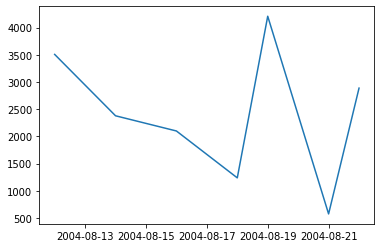

In [83]:
plt.plot(sample['date'], sample['n_words_post']);

In [84]:
data_full.groupby('blogger_id').post.agg('count').reset_index().describe()

,post
count,19320.000000
mean,17.115787
std,38.754473
min,1.000000
25%,3.000000
50%,6.000000
75%,15.000000
max,800.000000


In [85]:
data_full_agg = data_full.groupby('blogger_id').post.agg('count').reset_index().sort_values(by='post', ascending = False)


In [76]:
data_full_agg

,blogger_id,post
318,1270648,800
18910,595404,731
19092,780903,709
969,1784456,690
18800,449628,671
...,...,...
12856,3912370,1
6380,3484466,1
16732,4171607,1
8089,3590584,1


In [74]:
writers_100_plus = data_full_agg[data_full_agg['post'] > 700]['blogger_id']

In [75]:
writers_100_plus

318      1270648
18910     595404
19092     780903
Name: blogger_id, dtype: object

In [66]:
data_full

,date,blogger_id,gender,age,occupation,name,post
0,"19,August,2004",4162441,male,16,Student,Sagittarius,DESTINY... you might not say a...
13,"19,August,2004",4157968,male,16,Student,Pisces,"As I strolled into the mall yesterday,..."
17,"19,August,2004",4278694,female,24,Technology,Virgo,I've never really had a blog bef...
69,"19,August,2004",4261114,female,40,indUnk,Gemini,I love to read novels. I l...
79,"19,August,2004",4215047,male,17,Student,Aquarius,today.. really a very sad day...
...,...,...,...,...,...,...,...
50463676,"12,February,1999",2999514,male,27,Engineering,Pisces,[detail] Propog...
50482996,"01,April,1999",2999514,male,27,Engineering,Pisces,[detail] I actually...
50502316,"05,June,1999",2999514,male,27,Engineering,Pisces,[detail] A tria...
50521636,"16,December,1999",2999514,male,27,Engineering,Pisces,[detail] Points...


In [ ]:
with open('blogger_com_data_19320_&_clean.pkl', 'wb') as pf:
    pickle.dump(data, pf)

In [87]:
data_full

,date,blogger_id,gender,age,occupation,name,post,n_words_post
0,2004-08-19,4162441,male,16,Student,Sagittarius,DESTINY... you might not say a...,849
13,2004-08-19,4157968,male,16,Student,Pisces,"As I strolled into the mall yesterday,...",2134
17,2004-08-19,4278694,female,24,Technology,Virgo,I've never really had a blog bef...,896
69,2004-08-19,4261114,female,40,indUnk,Gemini,I love to read novels. I l...,1999
79,2004-08-19,4215047,male,17,Student,Aquarius,today.. really a very sad day...,4207
...,...,...,...,...,...,...,...,...
50463676,1999-02-12,2999514,male,27,Engineering,Pisces,[detail] Propog...,263
50482996,1999-04-01,2999514,male,27,Engineering,Pisces,[detail] I actually...,237
50502316,1999-06-05,2999514,male,27,Engineering,Pisces,[detail] A tria...,244
50521636,1999-12-16,2999514,male,27,Engineering,Pisces,[detail] Points...,425


In [70]:
with open('blogger_com_data_330677_7_clean.pkl', 'wb') as pf:
    pickle.dump(data_full, pf)

In [ ]:
#Watson 

In [103]:
small_data = data_full.iloc[:10,:]
small_data

,date,blogger_id,gender,age,occupation,name,post,n_words_post
0,2004-08-19,4162441,male,16,Student,Sagittarius,DESTINY... you might not say a...,849
13,2004-08-19,4157968,male,16,Student,Pisces,"As I strolled into the mall yesterday,...",2134
17,2004-08-19,4278694,female,24,Technology,Virgo,I've never really had a blog bef...,896
69,2004-08-19,4261114,female,40,indUnk,Gemini,I love to read novels. I l...,1999
79,2004-08-19,4215047,male,17,Student,Aquarius,today.. really a very sad day...,4207
81,2004-08-19,4154732,male,24,Internet,Capricorn,Just got out of bed. Having trouble...,1007
92,2004-08-19,4285708,male,17,Student,Leo,Welcome to happy land. Here I will be ...,339
111,2004-08-19,4177618,female,15,indUnk,Gemini,Session Start (Wed Aug 18 22:52:31 2004...,2340
114,2004-08-19,4031537,male,15,Student,Leo,It's been quite a while since I've...,2413
140,2004-08-19,4304522,male,17,Student,Leo,Kari's parents are actually going...,358


In [140]:
#!pip install --upgrade "ibm-watson>=4.4.0"

In [ ]:
login=''
password=''

In [100]:
from ibm_watson import PersonalityInsightsV3
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
import time

In [101]:
authenticator = IAMAuthenticator(key)
PI = PersonalityInsightsV3(
    version='2017-10-13',
    authenticator=authenticator
)

personality_insights.set_service_url('https://api.us-east.personality-insights.watson.cloud.ibm.com')

In [118]:
from ibm_watson import ApiException
try:
    authenticator = IAMAuthenticator(key)
    PI = PersonalityInsightsV3(
        version='2017-10-13',
        authenticator=authenticator)
except:
    print("Method failed with status code " + str(ex.code) + ": " + ex.message)

In [122]:

from ibm_watson import DiscoveryV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

In [123]:

# In the constructor, letting the SDK manage the token
authenticator = IAMAuthenticator(key,
                                 url='https://api.us-east.personality-insights.watson.cloud.ibm.com') # optional - the default value is https://iam.cloud.ibm.com/identity/token
discovery = DiscoveryV1(version='2017-10-13',
                        authenticator=authenticator)
discovery.set_service_url('https://api.us-east.personality-insights.watson.cloud.ibm.com')

In [124]:
from ibm_watson import IAMTokenManager

# In your API endpoint use this to generate new bearer tokens
iam_token_manager = IAMTokenManager(apikey=key)
token = iam_token_manager.get_token()

In [126]:
from ibm_watson import DiscoveryV1
from ibm_cloud_sdk_core.authenticators import BearerTokenAuthenticator

# in the constructor, assuming control of managing the token
authenticator = BearerTokenAuthenticator(token)
discovery = DiscoveryV1(version='2017-10-13',
                        authenticator=authenticator)
discovery.set_service_url('https://api.us-east.personality-insights.watson.cloud.ibm.com')

In [127]:
from ibm_watson import DiscoveryV1
from ibm_cloud_sdk_core.authenticators import BasicAuthenticator

authenticator = BasicAuthenticator(login, password)
discovery = DiscoveryV1(version='2017-10-13', authenticator=authenticator)
discovery.set_service_url('https://api.us-east.personality-insights.watson.cloud.ibm.com')

In [137]:
from ibm_watson import PersonalityInsightsV3
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

authenticator = IAMAuthenticator(key)
personality_insights = PersonalityInsightsV3(
    version='2017-10-13',
    authenticator=authenticator
)

personality_insights.set_service_url('https://api.us-east.personality-insights.watson.cloud.ibm.com')

personality_insights.set_disable_ssl_verification(False)

In [138]:
authenticator

In [133]:
from ibm_watson import AssistantV1

assistant = AssistantV1(
    version='2017-10-13',
    authenticator=authenticator)

response = assistant.list_workspaces(headers={'Custom-Header': 'custom_value'})
print(response.get_result())
print(response.get_headers())
print(response.get_status_code())

ERROR:root:Forbidden
Traceback (most recent call last):
  File "/Users/elena/opt/anaconda3/lib/python3.7/site-packages/ibm_cloud_sdk_core/base_service.py", line 229, in send
    response.status_code, error_message, http_response=response)
ibm_cloud_sdk_core.api_exception.ApiException: Error: Forbidden, Code: 403


ApiException: Error: Forbidden, Code: 403

In [136]:
with open('Game_Center_Terms_and_Conditions.txt') as f:
        profile = PI.profile(f.read(),  accept='application/json')
        get_result()

ERROR:root:Forbidden
Traceback (most recent call last):
  File "/Users/elena/opt/anaconda3/lib/python3.7/site-packages/ibm_cloud_sdk_core/base_service.py", line 229, in send
    response.status_code, error_message, http_response=response)
ibm_cloud_sdk_core.api_exception.ApiException: Error: Forbidden, Code: 403


ApiException: Error: Forbidden, Code: 403

In [108]:
from ibm_watson import PersonalityInsightsV3
from ibm_cloud_sdk_core.authenticators import BasicAuthenticator

authenticator = BasicAuthenticator(login,password)

personality_insights = PersonalityInsightsV3(
    version='2017-10-13',
    authenticator=authenticator
)

personality_insights.set_service_url('https://api.us-east.personality-insights.watson.cloud.ibm.com')



In [ ]:
# get_status_code()

In [139]:
# #Get the current time on the clock
# time_start = time.clock()

# #-------------------------------------------------------------------------
# #Iterate Over All the Reviews and Append the Result:
# #-------------------------------------------------------------------------    
# for index, review in small_data['post'].iteritems():
    
#     #Get the words in the review
#     count = len(review.split()) 
    
#     #Check if it's greater than 100
#     if count >= 100:
    
#         #Enough words to feed into PI
#         #Pass on the review to PI
#         json_output = PI.profile(content=review,accept='test', content_type='text/plain')

#         #Iterate over the result (having heirarchy)
#         for i in json_output['personality']:
#             for j in i['children']:
#                 #Append the attributes to the data
#                 small_data.set_value(index, j['name'], j['percentile']) 
                        
#         for i in json_output['needs']:
#             #Append the attributes to the data
#             small_data.set_value(index, i['name'], i['percentile']) 
            
#         for i in json_output['values']:
#             #Append the attributes to the data
#             small_data.set_value(index, i['name'], i['percentile']) 
# #-------------------------------------------------------------------------

# #Get the current time again and subract from 
# #previous to measure the time taken        
# time_end = time.clock() - time_start

# #Print the time taken
# print(time_end)

/Users/elena/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
ERROR:root:Forbidden
Traceback (most recent call last):
  File "/Users/elena/opt/anaconda3/lib/python3.7/site-packages/ibm_cloud_sdk_core/base_service.py", line 229, in send
    response.status_code, error_message, http_response=response)
ibm_cloud_sdk_core.api_exception.ApiException: Error: Forbidden, Code: 403


ApiException: Error: Forbidden, Code: 403

In [ ]:
# def generatePersonalDescription(request):
#     import requests
#     from requests.auth import HTTPBasicAuth
#     IBM_API_URL = "https://gateway.watsonplatform.net/personality-insights/api/v2/profile"
#     top_level_url = "https://gateway.watsonplatform.net/personality-insights/api"
#     username = ""
#     password = ""

#     JSON_OBJ = {'contentItems': [{'content' : 'strcontent' , 'contenttype': 'application/json','sourceid': 'blog123','language': 'en'}]}

#     json_data = json.dumps(JSON_OBJ)

#     resp = requests.get(IBM_API_URL, auth=(username, password))

#     return HttpResponse(resp)

In [ ]:
# #Save the enriched data to another CSV File
# small_data.to_csv('OutputPI.csv')